# Lab 04 : Train vanilla neural network -- demo

## Training a one-layer net on MNIST

In [1]:
import sys, os

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### randint(a,b) returns a random integer between a and b:

In [10]:
idx = randint(5,10) # generate an integer randomly from 5 to 10 included
print(idx)

9


### Download the TRAINING SET (data+labels)

In [12]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()
print(data_path)

../../data/


In [13]:
train_data = torch.load(data_path+'mnist/train_data.pt')
print(train_data.size())

torch.Size([60000, 28, 28])


In [14]:
train_label = torch.load(data_path+'mnist/train_label.pt')
print(train_label.size())

torch.Size([60000])


### Download the TEST SET (data only)

In [15]:
test_data = torch.load(data_path+'mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [18]:
class one_layer_net(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        
        self.linear_layer = nn.Linear(input_size, output_size, bias = False)
        
    def forward(self, x):
        x = self.linear_layer(x)
        p = F.softmax(x, dim=1)
        return p

### Build the net

In [24]:
net = one_layer_net(784,10)
print(net)
print(net.linear_layer.weight)
print(net.linear_layer.bias)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)
Parameter containing:
tensor([[ 0.0203, -0.0160, -0.0279,  ...,  0.0197,  0.0233, -0.0130],
        [-0.0016,  0.0285, -0.0197,  ..., -0.0313, -0.0231,  0.0243],
        [-0.0054,  0.0160, -0.0098,  ..., -0.0132, -0.0045, -0.0060],
        ...,
        [-0.0233,  0.0320,  0.0055,  ...,  0.0279, -0.0285,  0.0164],
        [-0.0346, -0.0106, -0.0053,  ...,  0.0120, -0.0300,  0.0317],
        [ 0.0217, -0.0177, -0.0266,  ...,  0.0172,  0.0216,  0.0228]],
       requires_grad=True)
None


### Take the 6th image of the test set:

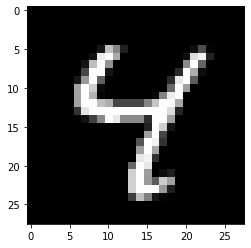

In [21]:
im = test_data[6]
utils.show(im)

### And feed it to the UNTRAINED network:

In [22]:
p = net(im.view(1,784))
print(p)

tensor([[0.0925, 0.1250, 0.0787, 0.1138, 0.1186, 0.1089, 0.1014, 0.0758, 0.0913,
         0.0940]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

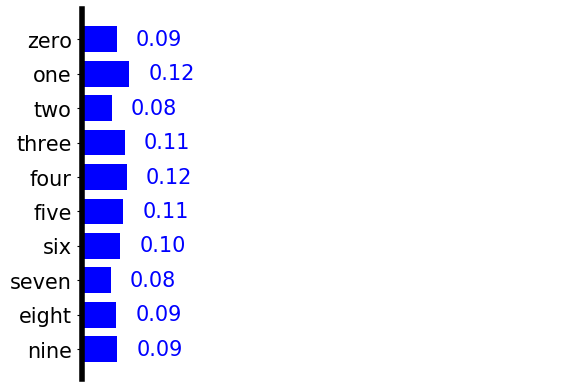

In [25]:
utils.show_prob_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [27]:
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999
    # extract the corresponding picture and label
    # and reshape them to fit the network
    idx = randint(0, 60000-1)
    input = train_data[idx].view(1, 784)
    label = train_label[idx].view(1)
    
    # feed the input to the net
    input.requires_grad_()
    prob = net(input)
    
    # update the weight (all the magic happens here -- we will discuss it later)
    log_prob = torch.log(prob)
    loss = criterion(log_prob, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

### Take the 6th image of the test set:

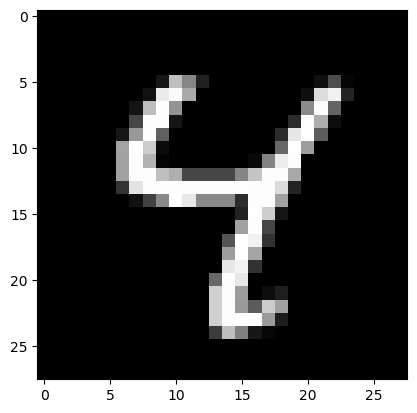

In [28]:
im = test_data[6]
utils.show(im)

### Feed it to the TRAINED net:

In [29]:
prob = net(im.view(1,784))
print(prob)

tensor([[1.8335e-04, 1.5046e-04, 4.0712e-04, 9.8637e-03, 7.1450e-01, 1.7650e-02,
         1.0013e-03, 2.1777e-02, 1.1926e-01, 1.1521e-01]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

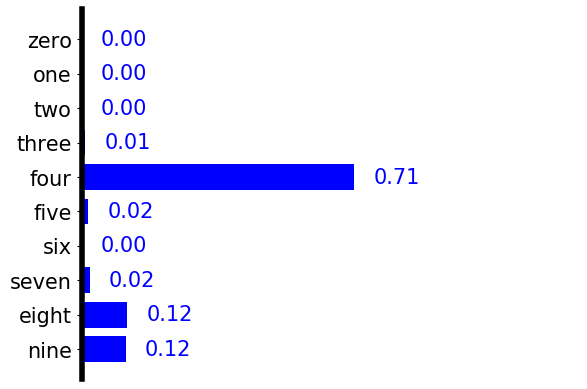

In [30]:
utils.show_prob_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

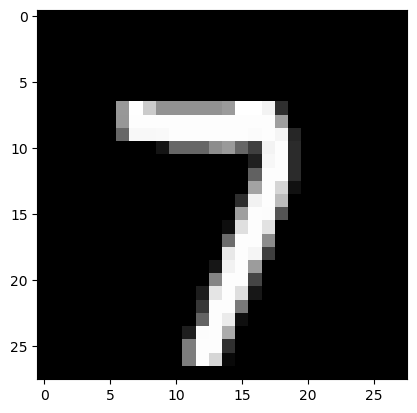

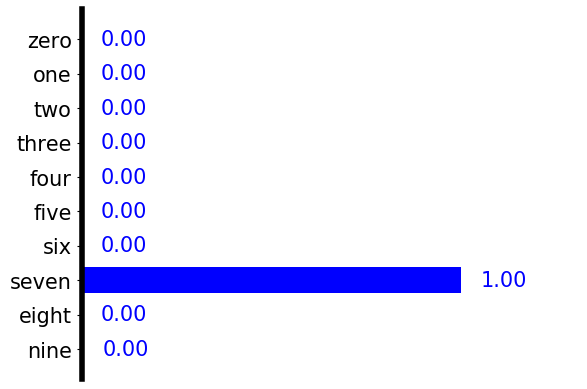

In [33]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# display the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob = net(im.view(1,784))
utils.show_prob_mnist(prob)

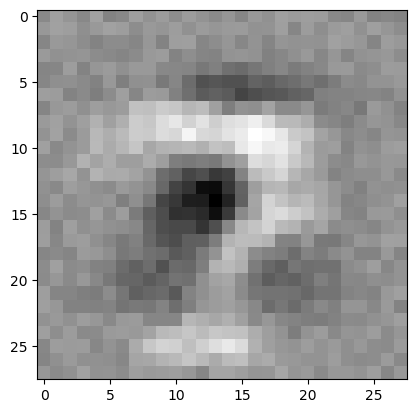

In [67]:
weights = net.linear_layer.weight[7].view(28, 28)
utils.show(weights.detach())